In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
datasets = [train_data, test_data]

In [3]:
def kmeans_chart(prop, size = 0):
    krange = range(1,size if size > 0 else train_data[prop].value_counts().size)
    inertias = []
    for i in krange:
        kmeans = KMeans(n_clusters=i, random_state=0).fit(train_data[prop].values.reshape(train_data[prop].size,1))
        inertias.append(kmeans.inertia_)

    plt.plot(krange, inertias)
    plt.title(prop)
    plt.xlabel('cluster')
    plt.ylabel('inertia')

In [4]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [5]:
names = train_data['Ticket'].str.extract('([A-Za-z]+)\.', expand=False)
print(names.value_counts())
title_mapping = { "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rev": 5, "Col": 6, "Dona": 7, "Dr": 8, "Ms": 9}
ticket_mapping = {"C": 1, "S": 2, "W": 3, "CA": 4, "O": 5, "F": 6, "A": 7}


C     28
S     14
W     10
CA     8
O      8
F      6
A      4
Name: Ticket, dtype: int64


In [6]:
sex_mapping = {"male": 0, "female": 1}
for dataset in datasets:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].dropna().median())
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['NTicket'] = dataset['Ticket'].str.extract('([A-Za-z]+)\.', expand=False)
    dataset['NTicket'] = dataset['NTicket'].map(ticket_mapping)
    dataset['NTicket'].fillna(8, inplace=True)
    dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)
    dataset['Title'].fillna(dataset.groupby('Age')['Title'].transform("median"), inplace=True)
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    dataset['Embarked'] = dataset['Embarked'].map({"S": 0, "C": 1, "Q": 2})
    dataset['Embarked'].fillna(value=3, inplace=True)
    dataset['Fare'].fillna(dataset.groupby('Title')['Fare'].transform("median"), inplace=True)
    

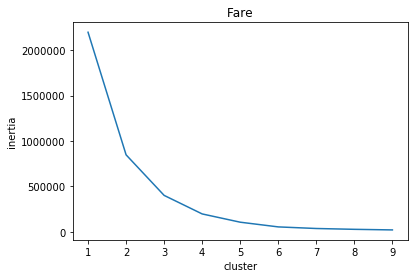

In [9]:
kmeans_chart('Fare', 10)
# bar_chart('Ticket')
#train_data['NTicket'].isnull().sum()
# train_data['NTicket'].value_counts()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_data.Age.values.reshape(train_data.Age.values.size, 1))
def transform_age(val):
    return kmeans.predict([[val]])[0]

kmeans_fare = KMeans(n_clusters=5, random_state=0).fit(train_data.Fare.values.reshape(train_data.Fare.size,1))
def transform_fare(val):
    return kmeans_fare.predict([[val]])[0]

mkeans_parch = KMeans(n_clusters=4, random_state=0).fit(train_data.Parch.values.reshape(train_data.Parch.size,1))
def transform_parch(val):
    return mkeans_parch.predict([[val]])[0]

mkeans_sibsp = KMeans(n_clusters=5, random_state=0).fit(train_data.SibSp.values.reshape(train_data.SibSp.size,1))
def transform_sibsp(val):
    return mkeans_sibsp.predict([[val]])[0]

kmeans_title = KMeans(n_clusters=4, random_state=0).fit(train_data.Title.values.reshape(train_data.Title.size,1))
def transform_title(val):
    return kmeans_title.predict([[val]])[0]

In [ ]:
for dataset in datasets:
    dataset['AgeGroup'] =  dataset['Age'].map(transform_age)
    dataset['Fare'] =  dataset['Fare'].map(transform_fare)
    dataset['Parch'] = dataset['Parch'].map(transform_parch)
    dataset['SibSp'] = dataset['SibSp'].map(transform_sibsp)
    dataset['Title'] = dataset['Title'].map(transform_title)
    

In [ ]:
train_data.head()

In [ ]:
# train_data['Fare'].value_counts().size

# test_data['NTicket'].fillna(train_data.groupby('Title')['NTicket'].transform("median"), inplace=True)
# test_data['NTicket'].fillna(7, inplace=True)
# train_data['NTicket'].isnull().sum()
bar_chart('NTicket')

In [ ]:
print(train_data.columns)

# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(train_data['Survived'].values.reshape(-1, 1))
scaler_x = StandardScaler()
X = scaler_x.fit_transform(train_data[['Pclass','Sex', 'AgeGroup', 'Title', 'Embarked', 'SibSp', 'Parch', 'Fare', 'NTicket']].values, y)


# X = train_data[['Pclass','Sex', 'AgeGroup', 'Title', 'Embarked', 'SibSp', 'Parch', 'Fare', 'NTicket']]
y = train_data['Survived']




k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# bar_chart('Ticket')

In [ ]:
# # X = train_data.Age[train_data['Sex'] == 'male'].value_counts().plot(kind="bar")
# survived = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]
# # 
# survived.Title.values


clf = svm.SVC(kernel='linear', gamma='scale', C=1)
scoring='accuracy'
scores = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# mae = mean_absolute_error(predictions, val_y)
# print(mae)
# print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

# survived.Age.size
# kmeans('age', survived.Age.values.reshape(survived.Age.size,1))
# kmeans('title', survived.Title.values.reshape(survived.Title.size,1))
# train_data[train_data['Sex'] == 'male'].describe()
# sns.relplot(x="timepoint", y="survived", col="region",
#             hue="event", style="event",
#             kind="line", data=fmri);

In [ ]:
gnb = GaussianNB()
scoring = 'accuracy'
scores_gnb = cross_val_score(gnb, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))

In [ ]:
random_forestc = RandomForestClassifier(random_state=1, n_estimators=600)
scoring = 'accuracy'
scores_rforestc = cross_val_score(random_forestc, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rforestc.mean(), scores_rforestc.std() * 2))

In [ ]:
nbrs = KNeighborsClassifier(n_neighbors=5)
scoring = 'accuracy'
scores_nbrs = cross_val_score(nbrs, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_nbrs.mean(), scores_nbrs.std() * 2))


In [ ]:
logr = LogisticRegression(random_state=5, max_iter=200)
scoring = 'accuracy'
scores_logr = cross_val_score(logr, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_logr.mean(), scores_logr.std() * 2))

In [ ]:
clf = svm.SVC(kernel='linear', gamma='auto', C=1)
clf.fit(X,y)

In [ ]:
test_data['Fare'].fillna(train_data.groupby('Title')['Fare'].transform("median"), inplace=True)
inputs = test_data[['Pclass','Sex', 'AgeGroup', 'Title', 'Embarked', 'SibSp', 'Parch', 'Fare', 'NTicket']];
# inputs['Fare'].fillna(test_data.groupby('Embarked')['Fare'].dropna().transform("median"). in_place=True)

In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=400)
model.fit(X,y)

prediction = model.predict(inputs)


In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('random-forest-ticket.csv', index=False)

In [ ]:
submission = pd.read_csv('temp.csv')
submission.head(20)

In [ ]:
new_file = 'random-forest-ticket.csv'
files = ['gauss.csv', 'logistic.csv', 'svm.csv', 'submission.csv', 'kmean_forest.csv']

df1 = pd.read_csv(new_file)
result = pd.DataFrame(columns=['file', 'equal', 'not equal', 'percentage'])
for file in files:
    if (file != new_file):
        df2 = pd.read_csv(file)
        df1['isEqual'] = np.where(df1['Survived'] == df2['Survived'],1,0)
        result = result.append({'file': file, 'equal': df1['isEqual'].value_counts()[1], 'not equal': df1['isEqual'].value_counts()[0], 'percentage': df1['isEqual'].value_counts()[1]/df1.size }, ignore_index=True)



result.head()

In [ ]:
df1.head(20)

In [ ]:
new_file = 'svm.csv'
bests = ['logistic.csv', 'temp.csv', 'submission.csv', 'new-alg.csv']

df1 = pd.read_csv(new_file)
result = pd.DataFrame(columns=['file', 'equal', 'not equal', 'percentage'])
for file in bests:
    if (file != new_file):
        df2 = pd.read_csv(file)
        df1['isEqual'] = np.where(df1['Survived'] == df2['Survived'],1,0)
        result = result.append({'file': file, 'equal': df1['isEqual'].value_counts()[1], 'not equal': df1['isEqual'].value_counts()[0], 'percentage': df1['isEqual'].value_counts()[1]/df1.size }, ignore_index=True)



result.head()